# COUNTRIES

In [1]:
# Import the necessary libraries
import pandas as pd
import json
import requests
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
# Read the CSV file
pd.options.display.max_colwidth = 200
country_df = pd.read_csv("Data/GlobalLandTemperaturesByCountry.csv")
country_df

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


In [3]:
# Using 'to_list()' converts the column labels to a Python list
columns = country_df.columns.to_list()
columns

['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'Country']

In [4]:
# Checck data types
country_df.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
Country                           object
dtype: object

In [5]:
country_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [6]:
# Convert to date time format
country_df["dt"] = pd.to_datetime(country_df["dt"])

In [7]:
years = country_df["dt"].dt.year
years.head()

0    1743
1    1743
2    1744
3    1744
4    1744
Name: dt, dtype: int32

In [8]:
country_df.insert(1, "Year", country_df["dt"].dt.year)
country_df.tail()

,dt,Year,AverageTemperature,AverageTemperatureUncertainty,Country
577457,2013-05-01,2013,19.059,1.022,Zimbabwe
577458,2013-06-01,2013,17.613,0.473,Zimbabwe
577459,2013-07-01,2013,17.000,0.453,Zimbabwe
577460,2013-08-01,2013,19.759,0.717,Zimbabwe
577461,2013-09-01,2013,NaN,NaN,Zimbabwe


In [9]:
country_df2 = country_df[['Year', 'AverageTemperature', 'Country']]
country_df2.head()

,Year,AverageTemperature,Country
0,1743,4.384,Åland
1,1743,NaN,Åland
2,1744,NaN,Åland
3,1744,NaN,Åland
4,1744,NaN,Åland


In [10]:
country_df2.dtypes

Year                    int32
AverageTemperature    float64
Country                object
dtype: object

In [11]:
# Determine the number of unique countries in the dataset
country_df["Country"].unique()
len(country_df["Country"].unique())

243

In [12]:
# Group by 'Year', 'City', and 'Country' and calculate the mean temperature for each year
country_df3 = country_df2.groupby(['Year', 'Country'])['AverageTemperature'].mean().reset_index()
country_df3.head()

,Year,Country,AverageTemperature
0,1743,Albania,8.620
1,1743,Andorra,7.556
2,1743,Austria,2.482
3,1743,Belarus,0.767
4,1743,Belgium,7.106


In [51]:
# Rename the columns
country_df4 = country_df3.rename(columns={'dt': 'Year', 'AverageTemperature': 'Yearly Average Temperature'})

# Display the DataFrame with the average temperature for each year
country_df4.head(100)

,Year,Country,Yearly Average Temperature
0,1743,Albania,8.620000
1,1743,Andorra,7.556000
2,1743,Austria,2.482000
3,1743,Belarus,0.767000
4,1743,Belgium,7.106000
...,...,...,...
95,1744,Switzerland,8.351625
96,1744,Ukraine,9.997125
97,1744,United Kingdom,9.088250
98,1744,United Kingdom (Europe),9.363125


In [14]:
# Determine the number of unique countries in the dataset
country_df["Country"].unique()
len(country_df["Country"].unique())

243

In [15]:
# earlies year is established as 1950 to align with the rest of the data 
earliest_year = 1950
latest_year = country_df4["Year"].max()

In [16]:
latest_year

2013

In [17]:
date_range = (f"Our date range is {earliest_year} to {latest_year}")
print(date_range)

Our date range is 1950 to 2013


In [18]:
cleaned_countries = country_df4[country_df4['Year']>=earliest_year]
cleaned_countries.head()

,Year,Country,Yearly Average Temperature
32691,1950,Afghanistan,13.043500
32692,1950,Africa,23.880833
32693,1950,Albania,13.812833
32694,1950,Algeria,22.781833
32695,1950,American Samoa,26.520083


In [19]:
reorderd_df = cleaned_countries[["Country", "Year", "Yearly Average Temperature"]]
reorderd_df.head()

,Country,Year,Yearly Average Temperature
32691,Afghanistan,1950,13.043500
32692,Africa,1950,23.880833
32693,Albania,1950,13.812833
32694,Algeria,1950,22.781833
32695,American Samoa,1950,26.520083


In [20]:
final_df = reorderd_df.dropna()
final_df.head()

,Country,Year,Yearly Average Temperature
32691,Afghanistan,1950,13.043500
32692,Africa,1950,23.880833
32693,Albania,1950,13.812833
32694,Algeria,1950,22.781833
32695,American Samoa,1950,26.520083


In [21]:
final_df.to_csv("Cleaned Data/Countries.csv", index=False)

# STATES 

In [22]:
states_df = pd.read_csv("Data/GlobalLandTemperaturesByState.csv.zip")
states_df.head()

ValueError: Multiple files found in ZIP file. Only one file per ZIP: ['GlobalLandTemperaturesByState.csv', '__MACOSX/._GlobalLandTemperaturesByState.csv']

In [ ]:
columns = states_df.columns.to_list()
# Or, you can use: columns = list(orders_df)
columns

In [ ]:
states_df.dtypes

In [ ]:
states_df["dt"] = pd.to_datetime(states_df["dt"])

In [ ]:
years = states_df["dt"].dt.year
years.head()

In [ ]:
states_df.insert(1, "Year", states_df["dt"].dt.year)
states_df.head()

In [ ]:
states_df2 = states_df[['Year', 'AverageTemperature', 'State', 'Country']]
states_df2.head()

In [ ]:
states_df2.dtypes

In [ ]:
# Group by 'Year' and 'State' and calculate the mean temperature for each year
states_df3 = states_df2.groupby(['Year', 'State', 'Country'])['AverageTemperature'].mean().reset_index()
states_df3.head()

In [ ]:
# earliest year is established as 1950 to align with the rest of the data 
earliest_year = 1950
latest_year = states_df3["Year"].max()

In [ ]:
latest_year

In [ ]:
date_range = (f"Our date range is {earliest_year} to {latest_year}")
print(date_range)

In [ ]:
cleaned_states = states_df3[states_df3['Year']>=earliest_year]
cleaned_states.head()

In [ ]:
reorderd_df = cleaned_states[["State", "Country", "Year", "AverageTemperature"]]
reorderd_df.head()

In [ ]:
reorderd_df = reorderd_df.rename(columns={'AverageTemperature': 'Yearly Average Temperature'})
reorderd_df.head()

In [ ]:
final_df = reorderd_df.dropna()
final_df.head()

In [ ]:
# Now you can use to_csv on the resulting DataFrame
final_df.to_csv("Cleaned Data/States.csv", index=False)

# CITIES 

In [ ]:
pd.options.display.max_colwidth = 200
# Extract the ZIP file manually as pd.read_csv function did not work due to compatibility issue
import zipfile
with zipfile.ZipFile("Data/GlobalLandTemperaturesByCity.csv.zip", 'r') as zip_ref:
    zip_ref.extractall("Data/")

# Read the CSV file directly
cities_df = pd.read_csv("Data/GlobalLandTemperaturesByCity.csv")

cities_df.head()

In [ ]:
# Converts the column labels to a Python list
cities_columns = list(cities_df)
cities_columns

In [ ]:
# Checck data types
cities_df.dtypes

In [ ]:
# Convert to date time format
cities_df["dt"] = pd.to_datetime(cities_df["dt"])

In [ ]:
years = cities_df["dt"].dt.year
years.head()

In [ ]:
cities_df.insert(1, "Year", cities_df["dt"].dt.year)
cities_df.head()

In [ ]:
cities_df2 = cities_df[['Year', 'AverageTemperature', 'City', 'Country']]
cities_df2.head()

In [ ]:
cities_df2.dtypes

In [ ]:
# Group by 'Year' and 'State' and calculate the mean temperature for each year
cities_df3 = cities_df2.groupby(['Year', 'City', 'Country'])['AverageTemperature'].mean().reset_index()
cities_df3.head()

In [ ]:
# Determine the number of unique cities in the dataset
cities_df["City"].unique()
len(cities_df["City"].unique())

In [ ]:
# earlies year is established as 1950 to align with the rest of the data 
earliest_year = 1950
latest_year = cities_df3["Year"].max()

In [ ]:
latest_year

In [ ]:
date_range = (f"Our date range is {earliest_year} to {latest_year}")
print(date_range)

In [ ]:
cleaned_cities = cities_df3[cities_df3['Year']>=earliest_year]
cleaned_cities.head()

In [ ]:
reorderd_df = cleaned_cities[["City", "Country", "Year", "AverageTemperature"]]
reorderd_df.head()

In [ ]:
reorderd_df = reorderd_df.rename(columns={'AverageTemperature': 'Yearly Average Temperature'})
reorderd_df.head()

In [ ]:
final_df = reorderd_df.dropna()
final_df.head()

In [ ]:
# final_city_df = cleaned_cities_dropna.groupby(['City', 'Country']).reset_index()
final_df.to_csv("Cleaned Data/Cities.csv", index=False)

# POPULATION

In [ ]:
# Function to fetch population data
def fetch_population_data(country_code):
    api_url = f"http://api.worldbank.org/v2/country/{country_code}/indicator/SP.POP.TOTL?date=1960:2022&format=json"
    response = requests.get(api_url)
    
    if response.status_code == 200:
        data = response.json()
        if len(data) > 1 and isinstance(data[1], list):
            indicator_data = data[1]
            df = pd.DataFrame(indicator_data)
            df = df[['date', 'value']]
            df.columns = ['Date', country_code]
            return df.dropna()
    
    return pd.DataFrame()

# Country Codes for the United States, South Africa, India, Germany, Brazil, Australia
country_codes = ["USA", "ZAF", "IND", "DEU", "BRA", "AUS"]

# Create an empty DataFrame to store data for all countries
all_data = pd.DataFrame({'Date': [str(year) for year in range(1960, 2023)]})

# Loop through each country code and fetch population data
for code in country_codes:
    country_data = fetch_population_data(code)
    if not country_data.empty:
        all_data = pd.merge(all_data, country_data, on='Date', how='left')
all_data.head(20)

In [ ]:
# Drop the NaN Values
all_countries_population = all_data.dropna()
all_countries_population.head(10)

In [ ]:
# Save the common DataFrame to a single CSV file
csv_file_name = "Cleaned Data/population.csv"
all_countries_population.to_csv(csv_file_name, index=False)

print(f"CSV file '{csv_file_name}' created successfully.")


# GLOBAL

In [ ]:
global_df = pd.read_csv("Data/GlobalTemperatures.csv")
global_df.head()

In [ ]:
pd.options.display.max_colwidth = 200
global_df.head()

In [ ]:
columns = global_df.columns.to_list()
# Or, you can use: columns = list(orders_df)
columns

In [ ]:
global_df.dtypes

In [ ]:
global_df["dt"] = pd.to_datetime(global_df["dt"])

In [ ]:
global_df.dtypes

In [ ]:
# Rename the columns
global_df = global_df.rename(columns={'dt': 'Date'})

# Display the DataFrame with the average temperature for each year
global_df.head()

In [ ]:
cleaned_states = global_df[global_df['Date']>="1950-02-01"]
cleaned_states

In [ ]:
cglobal_df = global_df.dropna()
cglobal_df

In [ ]:
# Add Year column, using for groupby
cglobal_df.insert(1, "Year", cglobal_df['Date'].dt.year)
cglobal_df.head(24)

In [ ]:
# Group by 'Year' and calculate the mean landaveragetemperature for each year
cols = ['LandAverageTemperature','LandMaxTemperature','LandMinTemperature','LandAndOceanAverageTemperature']
clean_global_df = cglobal_df.groupby(['Year'])[cols].mean().reset_index()
clean_global_df.head(10)

In [ ]:
# Now you can use to_csv on the resulting DataFrame
clean_global_df.to_csv("Cleaned Data/Global.csv", index=False)

# AIR POLLUTION

In [78]:
# Read the CSV file
pd.options.display.max_colwidth = 200
ap_df = pd.read_csv("Data/air-pollution.csv")
ap_df

,Country,Year,Nitrogen Oxide,Sulphur Dioxide,Carbon Monoxide,Organic Carbon,NMVOCs,Black Carbon,Ammonia
0,Afghanistan,1750,555.42,139.42,142073.31,5456.88,13311.29,1633.03,7628.36
1,Afghanistan,1760,578.45,145.09,147859.24,5679.12,13853.64,1699.54,7946.02
2,Afghanistan,1770,602.42,150.99,153867.41,5909.88,14416.85,1768.60,8276.90
3,Afghanistan,1780,627.37,157.11,160104.42,6149.44,15001.56,1840.29,8621.53
4,Afghanistan,1790,653.34,163.46,166576.77,6398.04,15608.38,1914.68,8980.49
...,...,...,...,...,...,...,...,...,...
47530,Zimbabwe,2015,83842.10,67231.29,1610636.44,108275.48,299713.47,30912.24,112425.84
47531,Zimbabwe,2016,76234.43,59452.70,1632515.11,111975.72,302718.32,31570.53,115539.98
47532,Zimbabwe,2017,74381.80,53891.39,1657688.51,114613.20,306905.62,32344.41,118254.66
47533,Zimbabwe,2018,73062.53,51072.78,1653664.68,114583.51,306860.21,32365.56,119965.76


In [79]:
# Using 'to_list()' converts the column labels to a Python list
columns = ap_df.columns.to_list()
columns

['Country',
 'Year',
 'Nitrogen Oxide',
 'Sulphur Dioxide',
 'Carbon Monoxide',
 'Organic Carbon',
 'NMVOCs',
 'Black Carbon',
 'Ammonia']

In [80]:
ap_df.dtypes

Country             object
Year                 int64
Nitrogen Oxide     float64
Sulphur Dioxide    float64
Carbon Monoxide    float64
Organic Carbon     float64
NMVOCs             float64
Black Carbon       float64
Ammonia            float64
dtype: object

In [81]:
ap_df["Country"].unique()
len(ap_df["Country"].unique())

230

In [82]:
earliest_date1 = ap_df['Year'].min()
earliest_date1

1750

In [83]:
earliest_date2 = 1950
earliest_date2


1950

In [84]:
filtered_ap_df = ap_df[ap_df['Year'] >= earliest_date2]
filtered_ap_df

,Country,Year,Nitrogen Oxide,Sulphur Dioxide,Carbon Monoxide,Organic Carbon,NMVOCs,Black Carbon,Ammonia
155,Afghanistan,1950,22275.35,777.88,440870.96,15114.38,35305.46,4558.01,35738.03
156,Afghanistan,1951,22543.15,798.25,420386.77,15181.04,35130.32,4577.78,36392.72
157,Afghanistan,1952,21627.07,808.01,397146.98,15248.12,33781.44,4596.74,36974.06
158,Afghanistan,1953,22802.86,852.10,378114.13,15310.15,34532.97,4615.94,37591.01
159,Afghanistan,1954,22913.53,877.14,356587.85,15367.04,34223.80,4632.69,38072.12
...,...,...,...,...,...,...,...,...,...
47530,Zimbabwe,2015,83842.10,67231.29,1610636.44,108275.48,299713.47,30912.24,112425.84
47531,Zimbabwe,2016,76234.43,59452.70,1632515.11,111975.72,302718.32,31570.53,115539.98
47532,Zimbabwe,2017,74381.80,53891.39,1657688.51,114613.20,306905.62,32344.41,118254.66
47533,Zimbabwe,2018,73062.53,51072.78,1653664.68,114583.51,306860.21,32365.56,119965.76


In [85]:
furthest_date2 = 2013
filtered_ap_df = filtered_ap_df[filtered_ap_df['Year'] <= furthest_date2]
filtered_ap_df

,Country,Year,Nitrogen Oxide,Sulphur Dioxide,Carbon Monoxide,Organic Carbon,NMVOCs,Black Carbon,Ammonia
155,Afghanistan,1950,22275.35,777.88,440870.96,15114.38,35305.46,4558.01,35738.03
156,Afghanistan,1951,22543.15,798.25,420386.77,15181.04,35130.32,4577.78,36392.72
157,Afghanistan,1952,21627.07,808.01,397146.98,15248.12,33781.44,4596.74,36974.06
158,Afghanistan,1953,22802.86,852.10,378114.13,15310.15,34532.97,4615.94,37591.01
159,Afghanistan,1954,22913.53,877.14,356587.85,15367.04,34223.80,4632.69,38072.12
...,...,...,...,...,...,...,...,...,...
47524,Zimbabwe,2009,54045.79,55758.22,1354217.78,101724.34,251730.79,29822.76,106895.17
47525,Zimbabwe,2010,66154.43,68444.63,1380175.91,101428.11,256686.80,29191.53,112596.41
47526,Zimbabwe,2011,81592.23,70872.93,1467395.02,101297.21,272999.86,29249.56,115929.98
47527,Zimbabwe,2012,86615.04,65949.37,1521450.29,102776.91,283139.41,29910.54,117893.34


In [86]:
# Drop rows with missing values in specified columns
columns_to_check = ['Country', 'Year', 'Nitrogen Oxide', 'Sulphur Dioxide', 'Carbon Monoxide', 'Organic Carbon', 'NMVOCs', 'Black Carbon', 'Ammonia']
filtered_ap_df = filtered_ap_df.dropna()
filtered_ap_df

,Country,Year,Nitrogen Oxide,Sulphur Dioxide,Carbon Monoxide,Organic Carbon,NMVOCs,Black Carbon,Ammonia
155,Afghanistan,1950,22275.35,777.88,440870.96,15114.38,35305.46,4558.01,35738.03
156,Afghanistan,1951,22543.15,798.25,420386.77,15181.04,35130.32,4577.78,36392.72
157,Afghanistan,1952,21627.07,808.01,397146.98,15248.12,33781.44,4596.74,36974.06
158,Afghanistan,1953,22802.86,852.10,378114.13,15310.15,34532.97,4615.94,37591.01
159,Afghanistan,1954,22913.53,877.14,356587.85,15367.04,34223.80,4632.69,38072.12
...,...,...,...,...,...,...,...,...,...
47524,Zimbabwe,2009,54045.79,55758.22,1354217.78,101724.34,251730.79,29822.76,106895.17
47525,Zimbabwe,2010,66154.43,68444.63,1380175.91,101428.11,256686.80,29191.53,112596.41
47526,Zimbabwe,2011,81592.23,70872.93,1467395.02,101297.21,272999.86,29249.56,115929.98
47527,Zimbabwe,2012,86615.04,65949.37,1521450.29,102776.91,283139.41,29910.54,117893.34


In [87]:
# Check the length of the DataFrame after dropna
print("Length of filtered DataFrame after dropna:", len(filtered_ap_df))


Length of filtered DataFrame after dropna: 14720


In [88]:
# Save the filtered DataFrame to a CSV file in the specified path
output_path = "Cleaned Data/Filtered_Air_Pollution.csv"
filtered_ap_df.to_csv(output_path, index=False)


In [89]:
mergedaircountry = pd.merge(final_df,filtered_ap_df)

In [90]:
mergedaircountry

,Country,Year,Yearly Average Temperature,Nitrogen Oxide,Sulphur Dioxide,Carbon Monoxide,Organic Carbon,NMVOCs,Black Carbon,Ammonia
0,Afghanistan,1950,13.043500,22275.35,777.88,440870.96,15114.38,35305.46,4558.01,35738.03
1,Africa,1950,23.880833,698457.78,1545654.28,21290512.77,836487.13,3366152.98,236940.00,1510755.19
2,Albania,1950,13.812833,3123.80,3591.99,129014.86,5801.52,14479.69,575.64,9052.65
3,Algeria,1950,22.781833,21566.63,17027.78,621034.10,22285.34,44159.90,6520.81,21454.74
4,American Samoa,1950,26.520083,190.72,163.22,481.34,17.40,120.88,9.19,56.95
...,...,...,...,...,...,...,...,...,...,...
12283,Vietnam,2013,25.232125,631322.05,400069.16,9241941.83,152120.43,2142990.19,57070.05,623592.33
12284,Western Sahara,2013,23.744250,1173.32,104.36,2317.22,2043.16,2269.39,534.93,2091.53
12285,Yemen,2013,28.129750,130042.79,102928.25,249134.31,8800.95,271787.51,9366.37,86355.54
12286,Zambia,2013,21.196000,48473.05,751799.58,1668285.65,72183.64,451392.52,20019.72,137745.77


In [91]:
germanyair = mergedaircountry[mergedaircountry['Country'] == "Germany"]
germanyair

,Country,Year,Yearly Average Temperature,Nitrogen Oxide,Sulphur Dioxide,Carbon Monoxide,Organic Carbon,NMVOCs,Black Carbon,Ammonia
65,Germany,1950,8.653417,827210.19,4622569.11,7229683.58,384141.35,1029622.37,62103.71,405639.49
257,Germany,1951,8.816417,944340.45,5121405.33,7668442.26,410212.67,1100981.61,68202.74,421904.10
449,Germany,1952,8.006833,984748.29,5262961.98,7779081.24,406017.31,1120840.90,74203.72,435636.49
641,Germany,1953,9.067000,1031629.26,5499140.43,7758814.62,407429.55,1149153.58,78729.04,449132.22
833,Germany,1954,7.788833,1104658.34,5755161.48,7854652.87,404969.04,1203916.59,84532.65,460444.01
...,...,...,...,...,...,...,...,...,...,...
11393,Germany,2009,9.359167,1262917.27,389244.62,2923733.50,88350.15,1124318.07,40248.67,659786.93
11585,Germany,2010,8.009000,1285289.59,405765.45,3289278.02,95024.23,1246667.90,40748.44,681208.42
11777,Germany,2011,9.819583,1249567.68,392727.29,3198908.20,87323.44,1137304.13,37683.21,666168.58
11969,Germany,2012,9.227167,1217567.30,372401.01,2828708.07,86836.77,1135038.90,36763.82,679799.76


In [92]:
germanyair

,Country,Year,Yearly Average Temperature,Nitrogen Oxide,Sulphur Dioxide,Carbon Monoxide,Organic Carbon,NMVOCs,Black Carbon,Ammonia
65,Germany,1950,8.653417,827210.19,4622569.11,7229683.58,384141.35,1029622.37,62103.71,405639.49
257,Germany,1951,8.816417,944340.45,5121405.33,7668442.26,410212.67,1100981.61,68202.74,421904.10
449,Germany,1952,8.006833,984748.29,5262961.98,7779081.24,406017.31,1120840.90,74203.72,435636.49
641,Germany,1953,9.067000,1031629.26,5499140.43,7758814.62,407429.55,1149153.58,78729.04,449132.22
833,Germany,1954,7.788833,1104658.34,5755161.48,7854652.87,404969.04,1203916.59,84532.65,460444.01
...,...,...,...,...,...,...,...,...,...,...
11393,Germany,2009,9.359167,1262917.27,389244.62,2923733.50,88350.15,1124318.07,40248.67,659786.93
11585,Germany,2010,8.009000,1285289.59,405765.45,3289278.02,95024.23,1246667.90,40748.44,681208.42
11777,Germany,2011,9.819583,1249567.68,392727.29,3198908.20,87323.44,1137304.13,37683.21,666168.58
11969,Germany,2012,9.227167,1217567.30,372401.01,2828708.07,86836.77,1135038.90,36763.82,679799.76


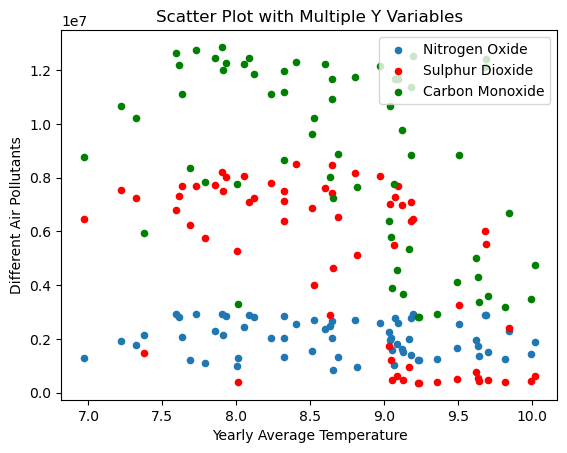

In [94]:
# Create a sample DataFrame
data = {'X': germanyair["Yearly Average Temperature"],
        'Y1': germanyair["Nitrogen Oxide"],
        'Y2': germanyair["Sulphur Dioxide"],
        'Y3': germanyair["Carbon Monoxide"],
       }
df = pd.DataFrame(data)

# Plotting the scatter plot for each y variable
ax = df.plot.scatter(x='X', y='Y1', label='Nitrogen Oxide')
df.plot.scatter(x='X', y='Y2', color='red', label='Sulphur Dioxide', ax=ax)
df.plot.scatter(x='X', y='Y3', color='green', label='Carbon Monoxide', ax=ax)

# Add labels and title
plt.xlabel('Yearly Average Temperature')
plt.ylabel('Different Air Pollutants')
plt.title('Scatter Plot with Multiple Y Variables')

# Show the plot
plt.legend()
plt.show()